In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data
data=pd.read_excel('Flight_Fare.xlsx')

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
# Categorical Data
cat_col=data[['Airline','Source','Destination','Total_Stops','Additional_Info']]

In [5]:
#Numerical Data
num_col=data[['Date_of_Journey','Dep_Time','Arrival_Time','Duration']]

In [6]:
# Check for Missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
#check for Duplicate value
data.duplicated().sum()

220

In [11]:
import datetime as dt

In [12]:
date_col=['Date_of_Journey','Arrival_Time','Dep_Time']

In [13]:
for column in date_col:
    data[column]=pd.to_datetime(data[column])

In [14]:
data['Day']=data.Date_of_Journey.dt.day

In [15]:
data['Month']=data['Date_of_Journey'].dt.month

In [16]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-09 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-09 05:50:00,2024-01-09 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-09 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9


In [17]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [18]:
data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-01-09 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-09 05:50:00,2024-01-09 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-09 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9


In [19]:
#  To extract the 'Dep_time' column into new columns 'Dep_hour' and 'Dep_min for prediction purposes

In [20]:
data['Dep_hour']=data['Dep_Time'].dt.hour

In [21]:
data['Dep_min']=data['Dep_Time'].dt.minute

In [22]:
data.drop('Dep_Time',axis=1,inplace=True)

In [23]:
data.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25


In [24]:
data['Arrival_hour']=data['Arrival_Time'].dt.hour

In [25]:
data['Arrival_min']=data['Arrival_Time'].dt.minute

In [26]:
data.drop('Arrival_Time',axis=1,inplace=True)

In [27]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


In [28]:
# To extract the Duration Column into minute for prediction

In [29]:
data['Duration']=pd.to_timedelta(data['Duration']).dt.total_seconds()

In [30]:
data['Duration_min']=data['Duration']/60

In [31]:
data.drop('Duration',axis=1,inplace=True)

In [32]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,445.0


In [33]:
# Convert Categorical data into Numerical Data 

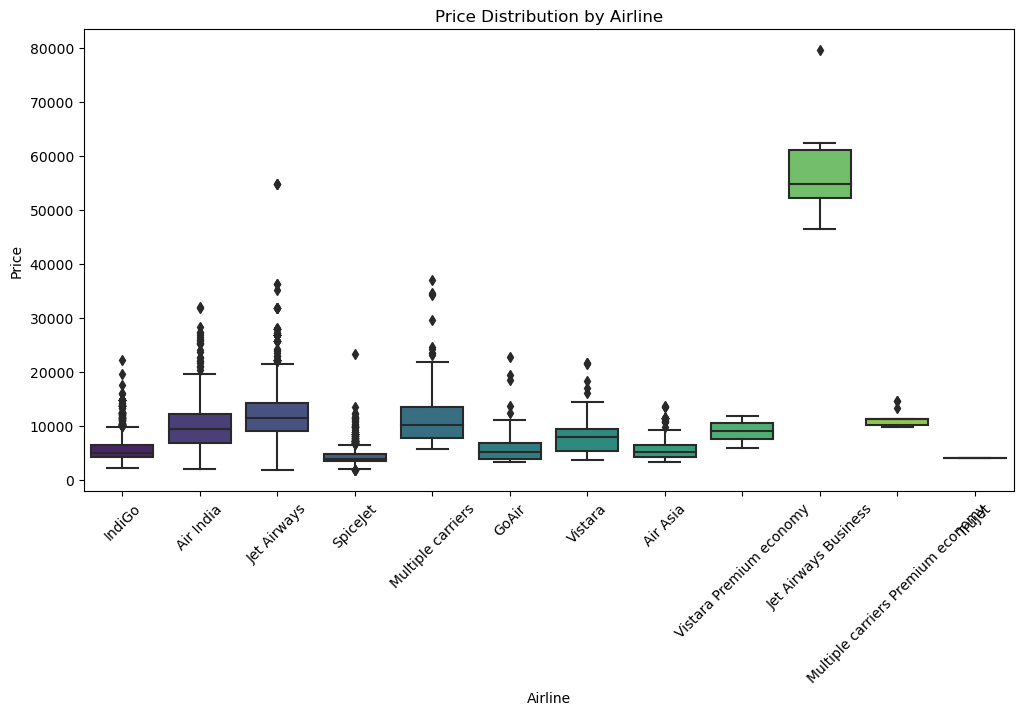

In [34]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(x='Airline', y='Price', data=data, palette='viridis')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price Distribution by Airline')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [35]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [36]:
#onhot encoding
data2=data.copy()

In [37]:
df1=pd.get_dummies(data2['Airline'],prefix='Airline',drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(['Airline'],axis=1)

In [38]:
data.head(4)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,325.0


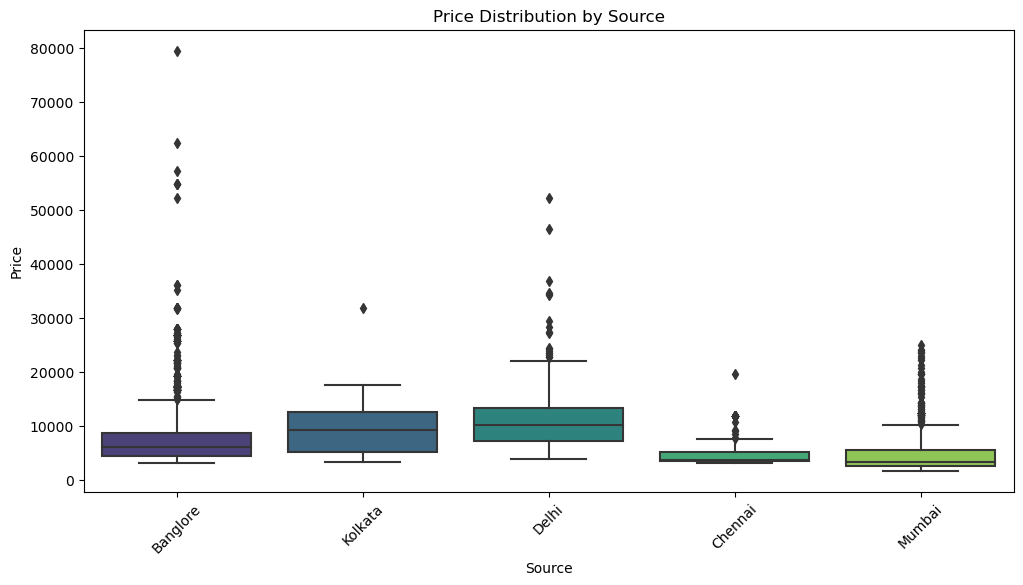

In [39]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(x='Source', y='Price', data=data, palette='viridis')
plt.xlabel('Source')
plt.ylabel('Price')
plt.title('Price Distribution by Source')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [40]:
data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [41]:
df2=pd.get_dummies(data2['Source'],prefix='Source',drop_first=True)
data2=pd.concat([data2,df2],axis=1).drop(['Source'],axis=1)

In [42]:
data2.head(3)

,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,...,0,0,0,0,0,0,0,1,0,0


In [43]:
df3=pd.get_dummies(data2['Destination'],prefix='Destination',drop_first=True)
data2=pd.concat([data2,df3],axis=1).drop(['Destination'],axis=1)

In [44]:
data2.head(2)

,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0


<Axes: xlabel='Total_Stops', ylabel='count'>

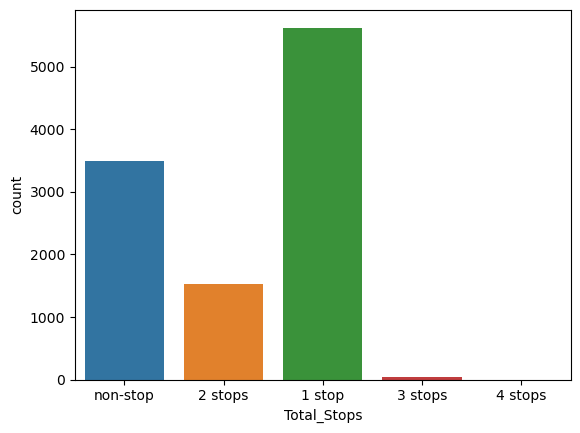

In [45]:
sns.countplot(x=data['Total_Stops'])

In [46]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [47]:
data2.Total_Stops=data2.Total_Stops.map({'1 stop':4,'non-stop':3,'2 stops':2,'3 stops':1,'4 stops':0})

In [48]:
data2.head(pd.set_option('display.max_columns',None))

,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,3,No info,3897,24,3,22,20,1,10,170.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,445.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,1140.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,4,No info,6218,5,12,18,5,23,30,325.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,4,No info,13302,3,1,16,50,21,35,285.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,3,No info,4107,4,9,19,55,22,25,150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,CCU → BLR,3,No info,4145,27,4,20,45,23,20,155.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,BLR → DEL,3,No info,7229,27,4,8,20,11,20,180.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,3,No info,12648,3,1,11,30,14,10,160.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [49]:
## Feature Engeinering

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

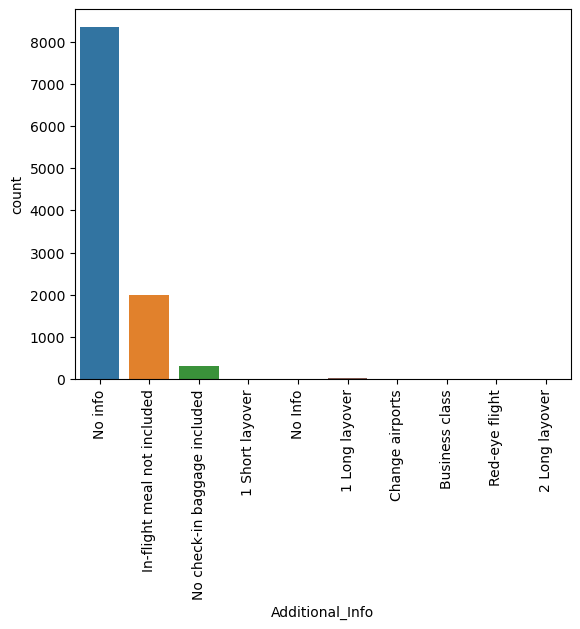

In [50]:
sns.countplot(x=data['Additional_Info'])
plt.xticks(rotation=90)

In [51]:
data2.drop('Additional_Info',axis=1,inplace=True)

In [52]:
data2.drop('Route',axis=1,inplace=True)

In [53]:
data2

,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,3897,24,3,22,20,1,10,170.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,445.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,1140.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,4,6218,5,12,18,5,23,30,325.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,13302,3,1,16,50,21,35,285.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,3,4107,4,9,19,55,22,25,150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,3,4145,27,4,20,45,23,20,155.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,3,7229,27,4,8,20,11,20,180.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,3,12648,3,1,11,30,14,10,160.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [54]:
data2.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_min', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [55]:
Corr_data=data2[['Day','Month','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Duration_min']]

In [56]:
Corr_data.corr()

,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
Day,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.038360
Month,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055136
Dep_hour,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002088
Dep_min,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.019099
Arrival_hour,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.051531
Arrival_min,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.069663
Duration_min,-0.038360,0.055136,0.002088,-0.019099,0.051531,-0.069663,1.000000


Text(0.5, 1.0, 'Correlation between the features')

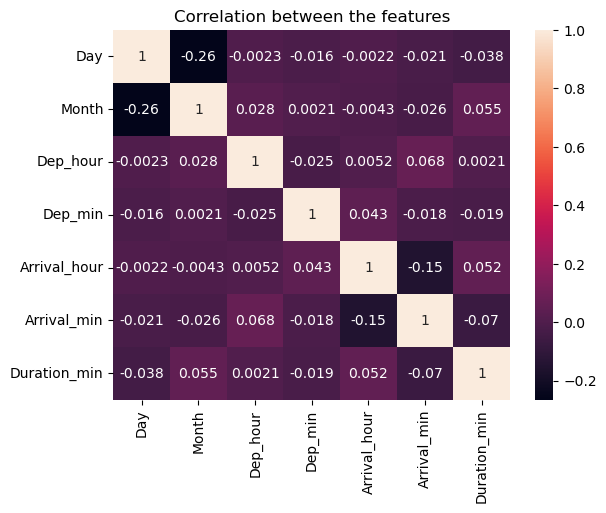

In [57]:
sns.heatmap(Corr_data.corr(),annot=True)
plt.title("Correlation between the features")

In [58]:
x= data2.drop('Price',axis=1)
x

,Total_Stops,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,24,3,22,20,1,10,170.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,445.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,1140.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,4,5,12,18,5,23,30,325.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,3,1,16,50,21,35,285.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,3,4,9,19,55,22,25,150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,3,27,4,20,45,23,20,155.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,3,27,4,8,20,11,20,180.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,3,3,1,11,30,14,10,160.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [59]:
y=data2[['Price']]

In [60]:
y

,Price
0,3897
1,7662
2,13882
3,6218
4,13302
...,...
10678,4107
10679,4145
10680,7229
10681,12648


In [61]:
# Extract Train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [62]:
#import Libraries
from sklearn.linear_model import LinearRegression
#initialize the model
ln=LinearRegression()

In [63]:
ln.fit(x_train,y_train)

LinearRegression()

In [64]:
y_pred=ln.predict(x_test)

In [65]:
y_pred.shape

(3205, 1)

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [67]:
#R2_SCORE
r2=r2_score(y_test,y_pred)
r2

0.5794694217394094

In [68]:
## KNN Regressor

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
y_pred1=knr.predict(x_test)

In [70]:
y_pred1

array([[16315. ],
       [ 5093.8],
       [ 8441.6],
       ...,
       [ 5675. ],
       [ 3572.4],
       [ 9119.6]])

In [71]:
#R2_Sccore
KNR_r2=r2_score(y_test,y_pred1)
KNR_r2

0.5528909899503456

In [72]:
# Support Vector Regressor

In [73]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred2=svr.predict(x_test)

In [74]:
y_pred2

array([8361.87668208, 8112.04272101, 8756.23256967, ..., 7273.36789997,
       7130.34276181, 8933.0430169 ])

In [75]:
#R2_Score
SVR_r2=r2_score(y_test,y_pred2)
SVR_r2

0.15569252879881346

In [76]:
# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)

In [78]:
y_pred4

array([16840.,  5752.,  9397., ...,  5601.,  3100.,  6734.])

In [79]:
#R2_score
DT_r2_score=r2_score(y_test,y_pred4)
DT_r2_score

0.7483818786211627

In [80]:
### HyperParameter Tuning for DecisionTreeRegressor

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2', None]  
}
dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor, param_grid, scoring='r2', cv=5, verbose=2)
grid_search.fit(x, y)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf

[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_lea

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5

[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_spl

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_spl

[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split

[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=

[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=

[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=

In [82]:
dtregressor=DecisionTreeRegressor(max_depth= 10,max_features='auto',min_samples_leaf=2,min_samples_split=2)
dtregressor.fit(x_train,y_train)
y_pred5=dtregressor.predict(x_test)

In [83]:
y_pred5

array([17062.25      ,  5632.41025641,  8541.43396226, ...,
        5830.35632184,  3100.        ,  6653.26267281])

In [84]:
# R2_score
DT_r2_score=r2_score(y_test,y_pred5)
DT_r2_score

0.7663211209016925

In [85]:
# Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred6=rfr.predict(x_test)

In [87]:
y_pred6

array([16719.88,  6134.58,  8787.21, ...,  5877.58,  3217.78,  6925.04])

In [88]:
#R2_Score
RFR_r2_score=r2_score(y_test,y_pred6)
RFR_r2_score

0.8195903081696269

In [89]:
### Hyperparameter Tuning for Randomforest Regressor

In [90]:
#initializie the libraries and parameters 
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=100,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [91]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
rfr_ht=RandomForestRegressor(random_state=42)
rfr_cv = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid, n_iter=100, cv=3, verbose=1, 
                            random_state=42, n_jobs=-1, scoring='r2')
rfr_cv.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=1)

In [92]:
rf_best_params=rfr_cv.best_params_
print(f"best_params:{rf_best_params}")

best_params:{'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 28, 'bootstrap': False}


In [93]:
rfr1=RandomForestRegressor(n_estimators=1800,max_features='sqrt',max_depth=28,min_samples_split=10,
                           min_samples_leaf=1,random_state=42,bootstrap=False)
rfr1.fit(x_train,y_train)
y_pred7=rfr1.predict(x_test)

In [94]:
y_pred7

array([16406.13683399,  6136.81523325,  8598.45944378, ...,
        5860.64736883,  3126.75615873,  6754.37199757])

In [95]:
#R2_Score
RFR_r2_score=r2_score(y_test,y_pred7)
RFR_r2_score

0.8443806163007448

In [96]:
#  Gradient Boosting

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_predgb=gbr.predict(x_test)

In [98]:
y_predgb

array([15761.64557211,  7816.20752252,  9471.85996078, ...,
        5119.1959937 ,  3322.61694025,  6700.35104574])

In [99]:
#R2_Score
GB_r2_score=r2_score(y_test,y_predgb)
GB_r2_score

0.792672866168395

In [100]:
# XG Boost

In [101]:
#install xgboosting
!pip install xgboost

In [102]:
import xgboost
from xgboost import XGBRegressor
xgb1=XGBRegressor()
xgb1.fit(x_train,y_train)
y_predxg=xgb1.predict(x_test)

In [103]:
y_predxg

array([16259.147 ,  6283.8594,  8535.751 , ...,  5541.153 ,  2766.3357,
        6680.434 ], dtype=float32)

In [104]:
#R2_Score
XB_r2_score=r2_score(y_test,y_predxg)
XB_r2_score

0.8412996869811202

In [105]:
# Hyperparameter Tuning for XGBoosting

In [106]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={ 'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
xbg2=XGBRegressor(random_state=42)
xgb_cv=RandomizedSearchCV(estimator=xbg2,param_distributions=param_grid,n_iter=100,cv=3,verbose=1,
                          random_state=42,n_jobs=-1,scoring='r2')
xgb_cv.fit(x,y)
cv_best_params=xgb_cv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 25.6, 'reg_alpha': 200, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 200})


In [107]:
xgb2=XGBRegressor(reg_lambda=6.4,reg_alpha=0.4,n_estimators=65,max_depth=10,learning_rate=0.2,gamma=3.2,random_state=42)
xgb2.fit(x_train,y_train)
y_predxgb=xgb2.predict(x_test)

In [108]:
y_predxgb

array([16865.436 ,  6646.577 ,  8291.717 , ...,  5514.9316,  3123.5352,
        6787.864 ], dtype=float32)

In [109]:
#R2_Score
XGB_r2_score=r2_score(y_test,y_predxgb)
XGB_r2_score

0.844363069052179